# Lineaerization of NL G

In [1]:
import requests as req, os
URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()
    %run basic_material.py
    
from sympy import solve, Piecewise, symbols
u = symbols('u')
y = symbols('y')
x = symbols('x')
    

Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found
Basic file found


## Linearization

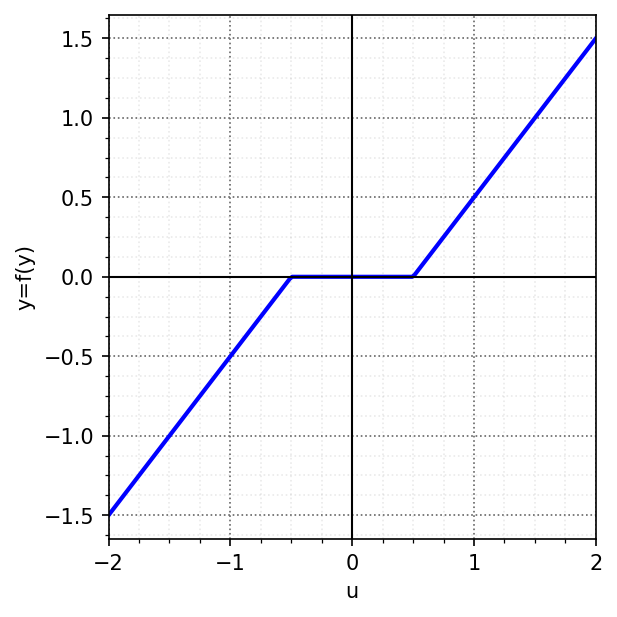

In [2]:
ub = 0.5
yb = 0
def f(u):
    if u >= ub:
        return yb + (u-ub)
    elif u <= -ub:
        return -yb + (u+ub)
    else:
        return yb*(u/ub)

uu = np.linspace(-2,2,200)
f_of_u = [f(x) for x in uu]

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
plt.plot(uu,f_of_u,'b')
plt.xlabel('u')
plt.ylabel('y=f(y)')
nicegrid(ax)
plt.show()

In [3]:
f = Piecewise(((x+ub)-yb, x < -ub), (yb*x/ub, ((-ub <= x) & (x <= ub))), ((x-ub)+yb, x > ub))

def u_g(k,r):
    u_sol = solve(u - k*(r - f.subs(x,u)),u) # find u that satisfies the feedback loop
    return f.subs(x,u_sol[0]) #if len(u_sol) > 0 else ([0])

def y_g(k,r):
    y_sol = solve(y - f.subs(x,k*(r-y)),y) # find y that satisfies the feedback loop
    try:
        return y_sol[0]
    except:
        return 0


In [4]:
def middle_gain(k):
    l = (yb/ub)*k
    return l/(1+l)

def linearized_gain(k):
    return k/(1+k)

def linearized_offset(k):
    return (ub-yb)/(k+1)

def break_points_in_r(k):
    return (yb + linearized_offset(k))/linearized_gain(k)

gains = [2,5,20]
for gain in gains: 
    print(r"For k = "+str(gain)+f" Break points: {break_points_in_r(gain):4.3f}")
print(f"Middle section gain = {middle_gain(5):4.3f}")

For k = 2 Break points: 0.250
For k = 5 Break points: 0.100
For k = 20 Break points: 0.025
Middle section gain = 0.000


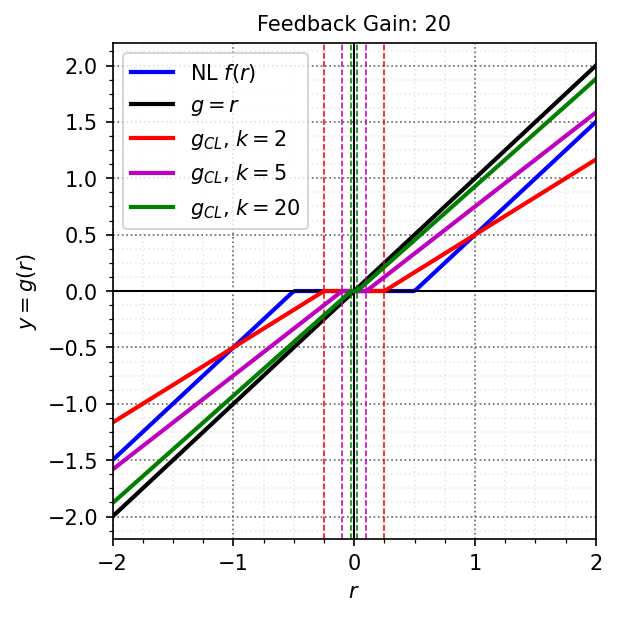

In [5]:
fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
plt.plot(uu,f_of_u,'b',label=r'NL $f(r)$')
plt.plot(uu,uu,color=colors[len(gains)+1],label=r'$g = r$')
plt.xlabel('$r$')
plt.ylabel('$y = g(r)$')
nicegrid(ax)
plt.savefig("./figs/Lect1_"+str(0)+".pdf", dpi=600)
for kk,gain in enumerate(gains):
    plt.plot(uu,[u_g(gain,w)  for w in uu],label=r'$g_{CL}$, $k=$'+str(gain),color=colors[kk+1])
    plt.axvline(x = break_points_in_r(gain),ls='--',c=colors[kk+1],lw=0.75)
    plt.axvline(x = -break_points_in_r(gain),ls='--',c=colors[kk+1],lw=0.75)
    plt.title("Feedback Gain: "+str(gain))
    plt.legend()
    plt.savefig("./figs/Lect1_"+str(gain)+".pdf", dpi=600)
plt.show()